In [1]:
import pandas as pd
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import itertools
import glob
import pywt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Train Data = Min/Max/Mean/Std/Median/Entropy

path = r'/home/giang/Lab/Code/Testsets' # use your path
classes = {0:'P0-W0', 1:'P1-W1', 2:'P9-W7', 3:'P14-W0'}

df, x_np1,x_np2,x_np, y_np = {}, {}, {}, {}, {}
x_np_all, y_np_all = np.empty((0,9)), np.empty((0))
window_size = 200
step = 10
temp = np.empty([1,window_size])
feature, feature1, feature2 = {}, {}, {}
channel = {}

for i, cls in classes.items():
    print(i, cls)
    all_files = glob.glob(path + "/" + cls + "/*.csv")
    df[i] = pd.concat((pd.read_csv(f, header=None) for f in all_files))
    x_np[i] = np.transpose(np.array(df[i]))
    print(x_np[i].shape)
      
    x_np[i] = x_np[i].reshape(-1,56)
    print(x_np[i].shape)
    
    x_np[i] = x_np[i].reshape(9,-1,56,order='F')
    print(x_np[i].shape)
    
#Difference
#     for k in range(x_np[i].shape[0]):
#         for t in range(x_np[i].shape[1]-1):
#             x_np[i][k,t,:] = x_np[i][k,t+1,:]-x_np[i][k,t,:]
#     x_np[i] = np.delete(x_np[i],-1,1)
#     x_np[i] = np.max(x_np[i],axis=2)
        
#Correlation    
#     for k in range(x_np[i].shape[0]):
#         for t in range(x_np[i].shape[1]-1):
#             x_np[i][k,t,:] = np.correlate(x_np[i][k,t+1,:],x_np[i][k,t,:])
#     print(x_np[i].shape)
#     x_np[i] = np.var(x_np[i],axis=2)
    
#    x_np1[i] = np.var(pywt.dwt(x_np[i],'db1',axis=2)[0],axis = 2)
#    x_np2[i] = np.var(pywt.dwt(x_np[i],'db1',axis=2)[1],axis = 2)
    
#    x_np1[i] = np.max(np.real(np.fft.fft(x_np[i], axis=2)),axis = 2)
#    x_np2[i] = np.max(np.imag(np.fft.fft(x_np[i], axis=2)),axis = 2)
    
    x_np1[i] = np.amin(x_np[i], axis=2)    #Min Feature
#    x_np2[i] = np.amax(x_np[i], axis=2)    #Max Feature
#    x_np[i] = np.mean(x_np[i], axis=2)    #Mean Feature
#    x_np[i] = np.std(x_np[i], axis=2)     #Standard Deviation Feature
#    x_np[i] = np.var(x_np[i], axis=2)     # Variance Feature
#    x_np[i] = stats.moment(x_np[i],2, axis=2)   # 2nd order Moment Feature
#    x_np1[i] = stats.moment(x_np[i],3, axis=2)   # 3rd order Moment Feature
#    x_np2[i] = stats.moment(x_np[i],4, axis=2)   # 4th order Moment Feature
#    x_np[i] = stats.entropy(x_np[i], axis=2)     #Entropy Feature
    print(x_np[i].shape)
#    print(x_np1[i].shape)
#    print(x_np2[i].shape)
    
#     track = np.empty([9,(x_np[i].shape[1]-window_size)//step])
#     for n in range(x_np[i].shape[0]):
#         for j in range(0,(x_np[i].shape[1]-window_size)//step):
#             for k in range(window_size):
#                 temp[0,k] = x_np[i][n,j+k]
#             track[n,j] = np.var(temp)
#     feature[i] = np.array(track)
#     print(feature[i].shape)
    
    track1 = np.empty([9,(x_np1[i].shape[1]-window_size)//step])
    for n in range(x_np1[i].shape[0]):
        for j in range(0,(x_np1[i].shape[1]-window_size)//step):
            for k in range(window_size):
                temp[0,k] = x_np1[i][n,j+k]
            track1[n,j] = np.var(temp)   
    feature1[i] = np.array(track1)
    print(feature1[i].shape)
    
    y_np[i] = np.ones(feature1[i].shape[1]) * i # Target label
    print(y_np[i])
    y_np_all = np.concatenate((y_np_all, y_np[i]), axis=0)
    print(y_np_all.shape)

#     track2 = np.empty([9,(x_np2[i].shape[1]-window_size)//step])
#     for n in range(x_np2[i].shape[0]):
#         for j in range(0,(x_np2[i].shape[1]-window_size)//step):
#             for k in range(window_size):
#                 temp[0,k] = x_np2[i][n,j+k]
#             track2[n,j] = np.var(temp)     
#     feature2[i] = np.array(track2)
#     print(feature2[i].shape)
    
# for j in range(x_np1[0].shape[1]-1):
#     plt.plot(x_np1[0][2,j,:])
    

0 P0-W0
(861, 504)
(7749, 56)
(9, 861, 56)
(9, 861, 56)
(9, 66)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(66,)
1 P1-W1
(743, 504)
(6687, 56)
(9, 743, 56)
(9, 743, 56)
(9, 54)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(120,)
2 P9-W7
(819, 504)
(7371, 56)
(9, 819, 56)
(9, 819, 56)
(9, 61)
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
(181,)
3 P14-W0
(824, 504)
(7416, 56)
(9, 824, 56)
(9, 824, 56)
(9, 62)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 

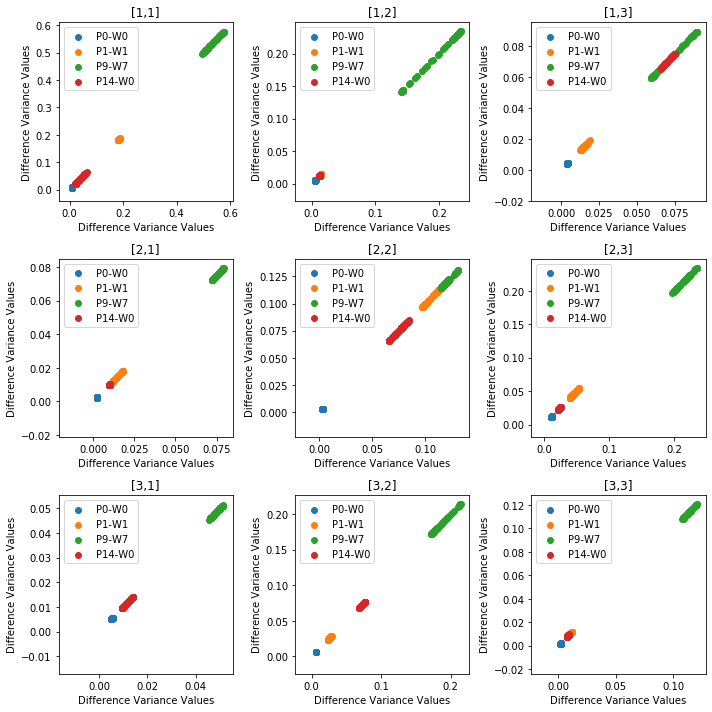

In [3]:
plt.figure(figsize = (10,10))
for k in range(9):  
    plt.subplot(331 + k)
    for i,cls in classes.items():
        plt.scatter(feature1[i][k,:],feature1[i][k,:],label = cls)
        plt.legend(loc = 'best')
        plt.title("[" + str(k//3+1) + "," + str(k%3+1) + "]")
#        plt.xlim(-0.03,0.2)
#        plt.ylim(-0.03,0.2)
        plt.xlabel("Difference Variance Values")
        plt.ylabel("Difference Variance Values")
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10,10))
# for k in range(9):   
#     plt.subplot(331 + k)
#     for i,cls in classes.items():
#         plt.scatter(feature1[i][k,:],feature1[i][k,:],label = cls)
#         plt.legend(loc = 'best')
#         plt.title("[" + str(k//3+1) + "," + str(k%3+1) + "]")
# #        plt.xlim(-0.03,0.2)
# #        plt.ylim(-0.03,0.2)
#         plt.xlabel("DWT Variance Values")
#         plt.ylabel("DWT Variance Values")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (10,10))
# for k in range(9):   
#     plt.subplot(331 + k)
#     for i,cls in classes.items():
#         plt.scatter(feature2[i][k,:],feature2[i][k,:],label = cls)
#         plt.legend(loc = 'best')
#         plt.title("[" + str(k//3+1) + "," + str(k%3+1) + "]")
# #        plt.xlim(-0.03,0.2)
# #        plt.ylim(-0.03,0.2)
#         plt.xlabel("DWT Variance Values")
#         plt.ylabel("DWT Variance Values")
# plt.tight_layout()
# plt.show()

In [4]:
for i in range(9):
    channel[i] = np.concatenate((feature1[0][i,:],feature1[1][i,:],feature1[2][i,:],feature1[3][i,:]),axis=0)
    #channel[i] = channel[i].reshape(-1,1)
    channel[i] = np.stack((channel[i],channel[i]),axis=1)
    print(channel[i].shape)

(243, 2)
(243, 2)
(243, 2)
(243, 2)
(243, 2)
(243, 2)
(243, 2)
(243, 2)
(243, 2)


In [5]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=500, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(channel[0])

In [6]:
km.cluster_centers_

array([[0.05021549, 0.05021549],
       [0.52771068, 0.52771068],
       [0.18342683, 0.18342683],
       [0.01210657, 0.01210657]])

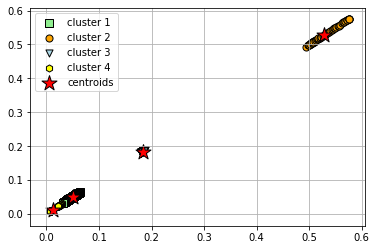

In [7]:
plt.scatter(
    channel[0][y_km == 0, 0], channel[0][y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    channel[0][y_km == 1, 0], channel[0][y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    channel[0][y_km == 2, 0], channel[0][y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    channel[0][y_km == 3, 0], channel[0][y_km == 3, 1],
    s=50, c='yellow',
    marker='h', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

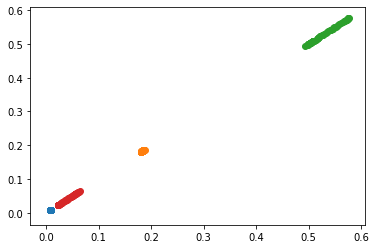

In [70]:
for i,cls in classes.items():
    plt.scatter(feature1[i][0,:],feature1[i][0,:],label = cls)

In [8]:
km.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3], dtype=int32)

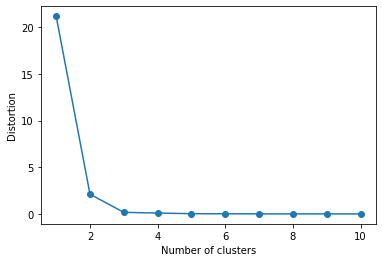

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(channel[0])
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [10]:
metrics.adjusted_rand_score(km.labels_,y_np_all)

0.7160183560680815